21390
array_star_mass=
[5.1143125e+11 3.9297016e+10 4.2904977e+10 ... 2.2191080e+07 2.2409666e+07
 7.3588115e+06]
array_h2=
[0.01107056 0.00108268 0.00536152 ... 0.         0.         0.        ]


/var/folders/xz/rh5fc0zn33v_kc78mlk1x2nm0000gp/T/ipykernel_18209/4205040707.py:79: RuntimeWarning: divide by zero encountered in log10
  sc = plt.scatter(array_star_mass, array_h2, s=10, alpha=0.7, c=np.log10(array_SFR), cmap='jet_r', vmin = -2, vmax = 1.5)


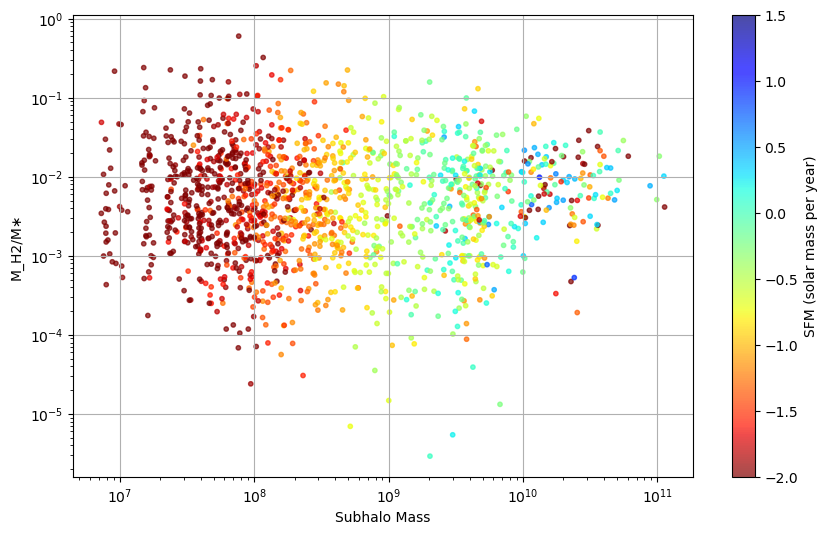

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
import matplotlib.ticker as ticker

h = 0.6711

file_path = "/Users/itamargoshen/Desktop/snapshot_090_(1).hdf5"
f_catalog = "/Users/itamargoshen/Desktop/groups_090_(1).hdf5"

data = h5py.File(file_path, "r")
f = h5py.File(f_catalog, 'r')

g_len_sh = f['Group/GroupLen'][:]
Nsub_h = f['Group/GroupNsubs'][:]

# for the subhalos lets read their position, mass, velocity, and SFR
pos_sh     = f['Subhalo/SubhaloPos'][:] / 1e3        # Mpc/h
vel_sh     = f['Subhalo/SubhaloVel'][:]              # km/s
mass_sh    = f['Subhalo/SubhaloMassType'][:] * 1e10  # Msun/h
len_sh     = f['Subhalo/SubhaloLen'][:]
index_h_sh = f['Subhalo/SubhaloGrNr'][:]
IDs_h      = f['IDs']['ID'][:]

array_gas_mass = []
array_star_mass = []
array_h2 = []
array_SFR = []

n_gal = np.shape(mass_sh)[0]

print(n_gal)

for index_sh in range(n_gal):
    index_h = index_h_sh[index_sh]  # index of the halo where this subhalo belongs to
    Nsub_prev_groups = np.sum(Nsub_h[:index_h])  # Number of subhalos in preceding halos
    preceeding_subhalos_in_halo = index_sh - Nsub_prev_groups  # Subhalos preceding our subhalo in its halo
    
    start = np.sum(g_len_sh[:index_h]) + np.sum(len_sh[Nsub_prev_groups:index_sh])

    end = start + len_sh[index_sh]
    
    mass_dm = data['PartType0/Masses'][start:end] * 1e10 / h 
    fracH2_dm = data['PartType0/FractionH2'][start:end] 
    fracH2_dm = fracH2_dm[fracH2_dm <= 1]
    mass_subhalo = mass_sh[index_sh][4]
    SFR_sh = f['Subhalo/SubhaloSFR'][:][index_sh]         

    fracH2mass = fracH2_dm * mass_dm
    
    total_fracH2mass = np.sum(fracH2mass) 
    mass_dm = np.sum(mass_dm)

    if mass_subhalo <= 0:
        continue
    

    array_gas_mass.append(mass_dm)
    array_h2.append(total_fracH2mass)
    array_star_mass.append(mass_subhalo)
    array_SFR.append(SFR_sh)
    #array_h2.extend(total_fracH2mass)
    #array_star_mass.extend([mass_subhalo] * len(fracH2_dm))

array_star_mass = np.array(array_star_mass)
array_h2 = np.array(array_h2)

array_h2 = array_h2/array_gas_mass

print("array_star_mass=") 
print(array_star_mass)

print("array_h2=")
print(array_h2)

plt.figure(figsize=(10, 6))
sc = plt.scatter(array_star_mass, array_h2, s=10, alpha=0.7, c=np.log10(array_SFR), cmap='jet_r', vmin = -2, vmax = 1.5)
#cbar = plt.colorbar(sc, label='SFR (solar mass per year)', format=ticker.LogFormatter())
plt.colorbar(sc, label='SFR (solar mass per year)') # add z = 0

plt.ylabel('M_H2/M∗')
plt.xlabel('Subhalo Mass')

plt.xscale('log')
plt.yscale('log')

plt.grid(True)
plt.show()

In [ ]:
#print("min array_h2")
#print(np.min(array_h2))

#print("max array_h2")
#print(np.max(array_h2))

#print("mean array_h2")
#print(np.mean(array_h2))


min array_h2
0.0
max array_h2
180.24254
mean array_h2
1.4603493
